In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [19]:
# Exibir as 5 primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(df.describe())

# Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Distribuição das classes no target (por exemplo, churn)
print("\nDistribuição das classes no target:")
print(df['Exited'].value_counts())

Primeiras 5 linhas do dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2 

C:\Users\Anthony\AppData\Local\Temp\ipykernel_22328\1056341498.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


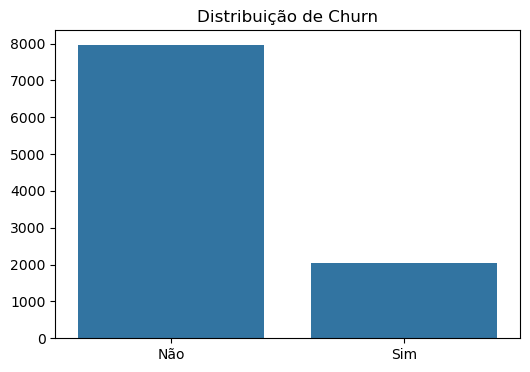

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df)
plt.title('Distribuição de Churn')
ax.set_xlabel('')
ax.set_ylabel('') 
ax.set_xticklabels(['Não', 'Sim'])

plt.show()


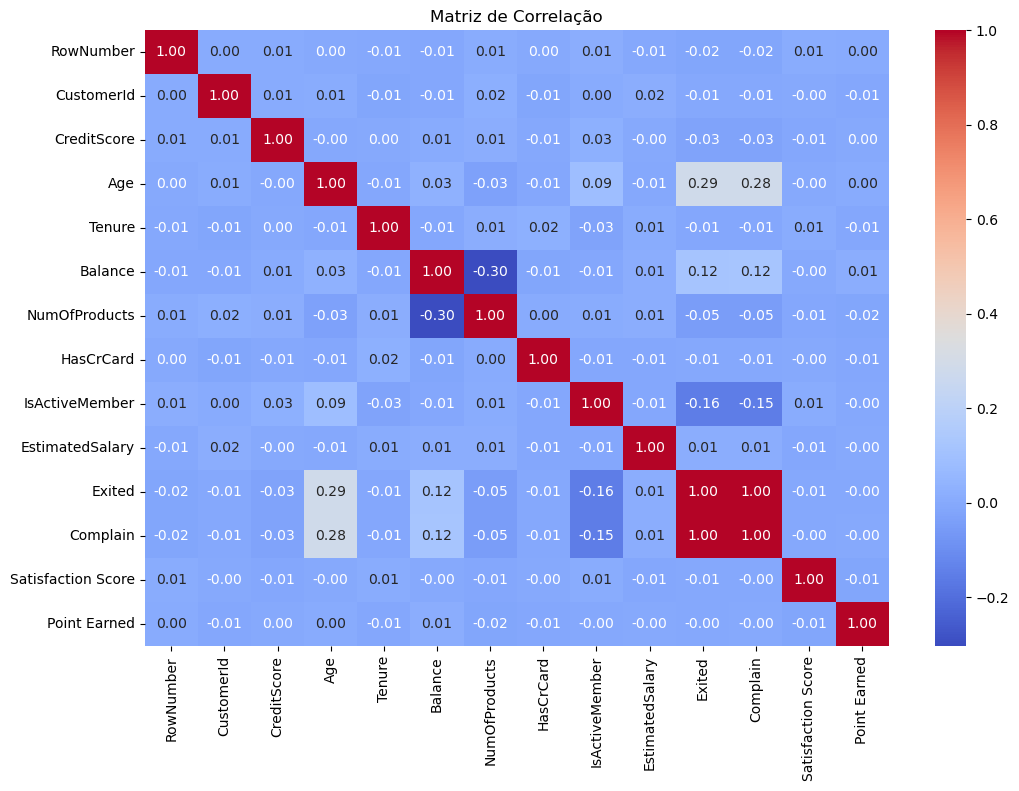

In [21]:
# Visualização das correlações entre as variáveis
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Seleciona apenas colunas numéricas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

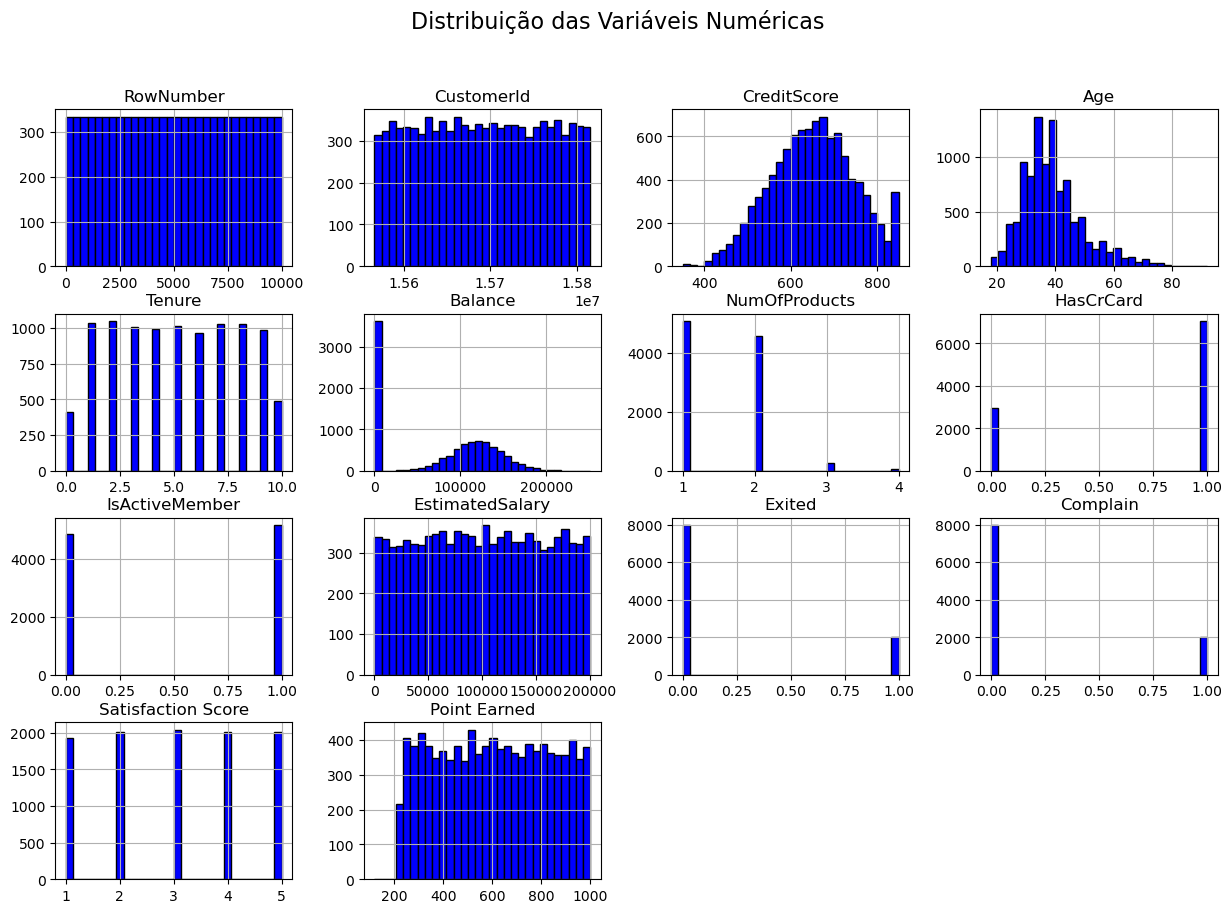

In [22]:
# Histogramas das variáveis numéricas
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()


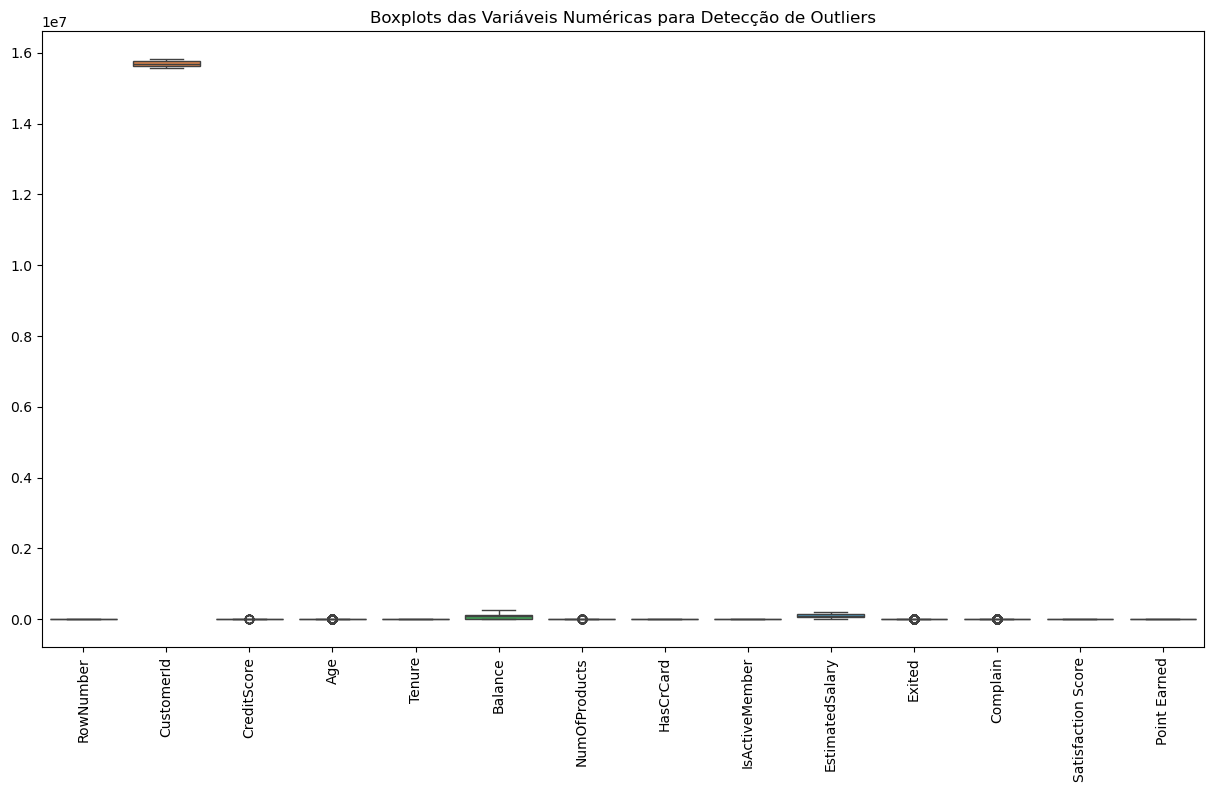

In [23]:
# Boxplots para detectar outliers nas variáveis numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots das Variáveis Numéricas para Detecção de Outliers')
plt.xticks(rotation=90)
plt.show()


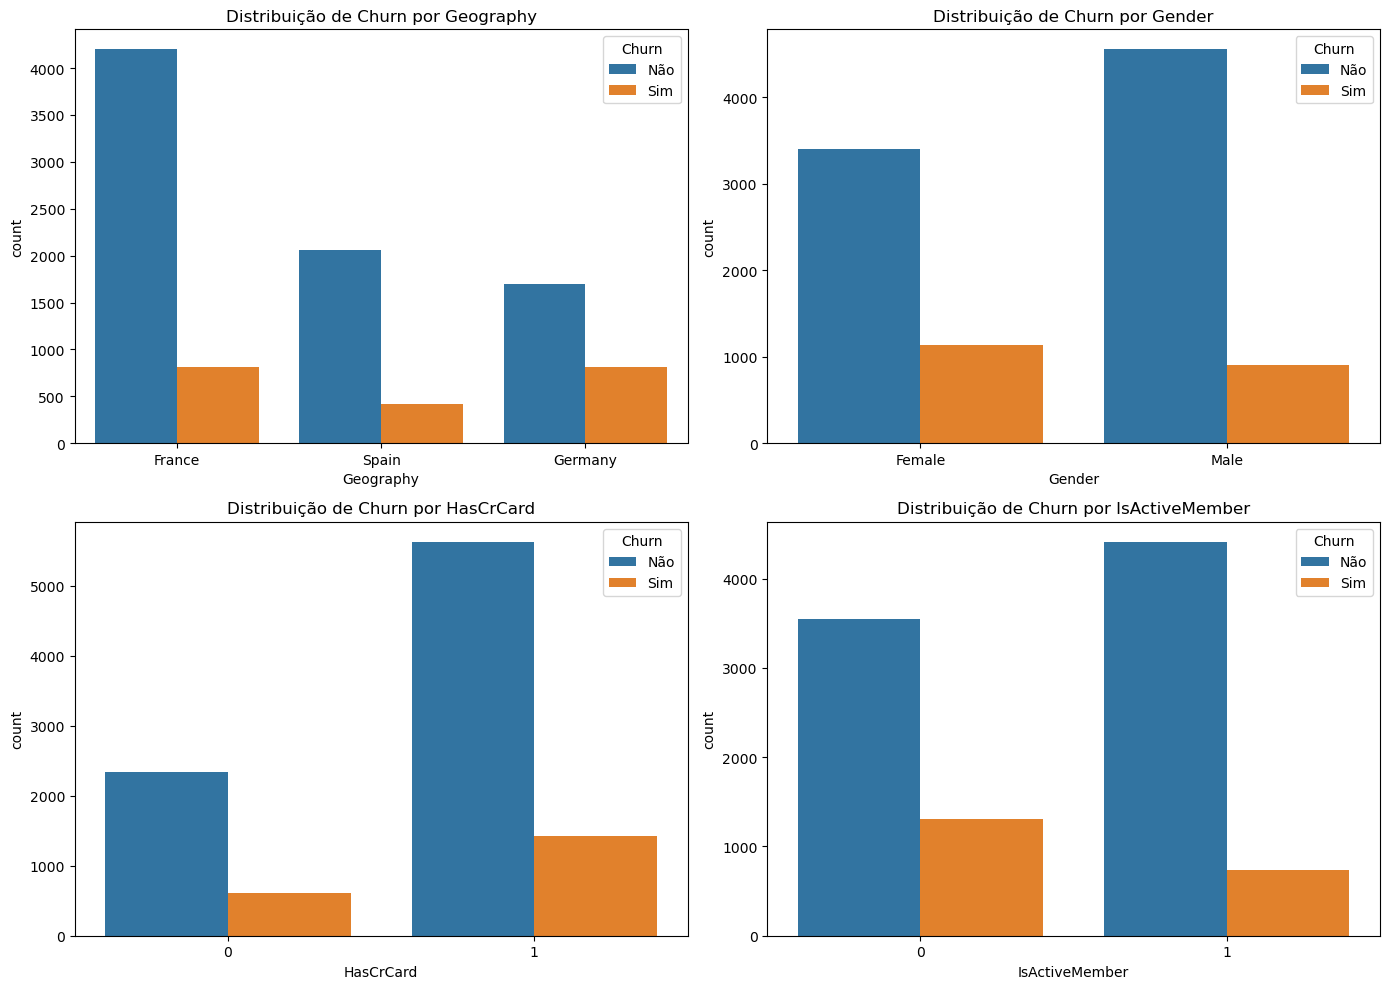

In [24]:
# Análise da relação entre churn e outras variáveis categóricas
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Distribuição de Churn por {col}')
    plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

In [25]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [26]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender', 'Card Type'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1,2,464,False,False,False,False,False,False
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,1,3,456,False,True,False,False,False,False
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,3,377,False,False,False,False,False,False
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,5,350,False,False,False,True,False,False
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,5,425,False,True,False,True,False,False


In [28]:
from sklearn.model_selection import *

X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((8000, 17), (2000, 17))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score (y_test, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

Acurácia do modelo: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\Anthony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f'AUC-ROC: {auc_roc:.2f}')

cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(cm)

report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(report)

AUC-ROC: 1.00
Matriz de Confusão:
[[1606    1]
 [   1  392]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



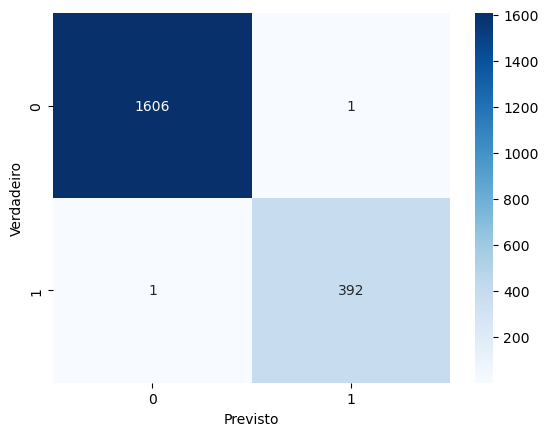

In [31]:
# Cálculo das métricas detalhadas
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
support_0 = cm[0, 0] + cm[0, 1]  # Total da classe 0

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
support_1 = cm[1, 0] + cm[1, 1]  # Total da classe 1

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


Métricas para a Classe 0:
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 1607

Métricas para a Classe 1:
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 393




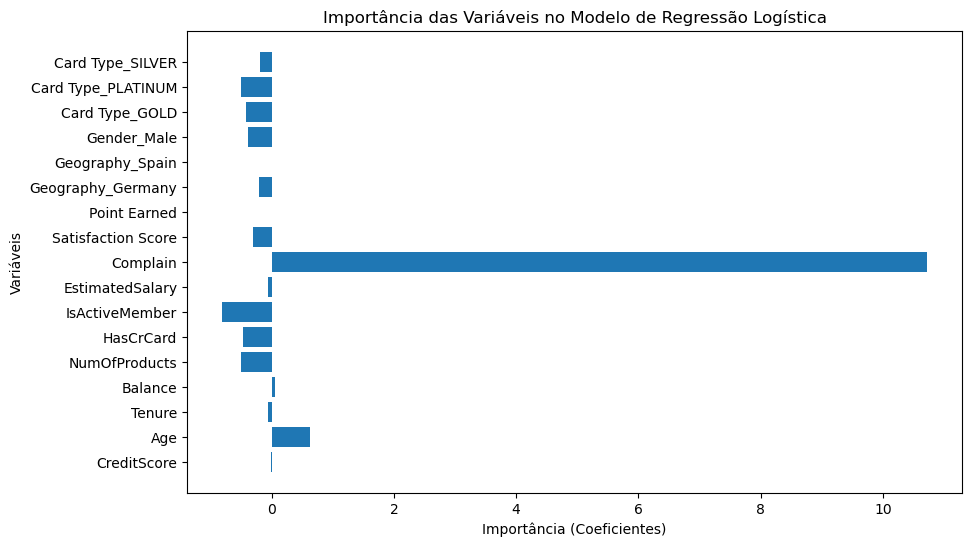

In [32]:
if hasattr(model, 'coef_'):

    print("\nMétricas para a Classe 0:")
    print(f"Precisão: {precision_0:.2f}")
    print(f"Recall: {recall_0:.2f}")
    print(f"F1-Score: {f1_0:.2f}")
    print(f"Support: {support_0}")
  
    print("\nMétricas para a Classe 1:")
    print(f"Precisão: {precision_1:.2f}")
    print(f"Recall: {recall_1:.2f}")
    print(f"F1-Score: {f1_1:.2f}")
    print(f"Support: {support_1}\n\n")
  
    # Para a Regressão Logística, usamos coef_ ao invés de feature_importances_
    importancia_features = model.coef_[0]  # Acesso aos coeficientes do modelo

    # Obter os nomes das colunas
    colunas_totais = X.columns.tolist()

    # Visualizar a importância
    plt.figure(figsize=(10, 6))
    plt.barh(colunas_totais, importancia_features)
    plt.xlabel('Importância (Coeficientes)')
    plt.ylabel('Variáveis')
    plt.title('Importância das Variáveis no Modelo de Regressão Logística')
    plt.show()
else:
    print("O modelo não possui o atributo 'coef_'.")



In [33]:
"""
# Da para rodar um cross validation para visualizar mas vai da erro no cod kk
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv=5)  # cv é o número de folds

print(f'Scores de validação cruzada: {scores}')
print(f'Média das acurácias: {scores.mean():.2f}')
"""

"\n# Da para rodar um cross validation para visualizar mas vai da erro no cod kk\nfrom sklearn.ensemble import RandomForestClassifier \n\nmodel = RandomForestClassifier()\n\nscores = cross_val_score(model, X_train, y_train, cv=5)  # cv é o número de folds\n\nprint(f'Scores de validação cruzada: {scores}')\nprint(f'Média das acurácias: {scores.mean():.2f}')\n"